<a href="https://colab.research.google.com/github/rakshub/Machine-Learning-projects/blob/main/INSAID_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
#loading dataset
data = pd.read_csv(r"C:\Users\priya\Downloads\Fraud.csv")

In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.replace('?',np.nan,inplace = True)

In [ ]:
data.isnull().sum() #checking for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
lb = LabelEncoder()
data['type'] = lb.fit_transform(data['type'].values.reshape(-1,1))

C:\Users\priya\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data = data.drop(['nameOrig','nameDest'],axis = 1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
X = data.drop('isFraud',axis = 1)
y = data['isFraud']

In [ ]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X,y = smote.fit_resample(X,y) #countering imbalance problem

In [ ]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size =0.20,random_state = 21)

In [ ]:
ss = StandardScaler()

In [ ]:
Xtrain_ss = ss.fit_transform(Xtrain)
Xtest_ss = ss.transform(Xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [ ]:
lr.fit(Xtrain,ytrain)
lr.score(Xtrain,ytrain)

0.9067418861182067

In [ ]:
pred = lr.predict(Xtest)

In [ ]:
lr.score(Xtest,ytest)

0.9068953320982326

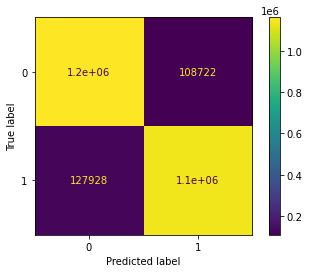

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay 
print(ConfusionMatrixDisplay.from_predictions(ytest,pred))